In [68]:
import numpy as np

# Read male data
male = np.genfromtxt('C:\\Users\\Shruti Mishra\\Downloads\\male_data.csv', delimiter=',', skip_header=1)

# Read female data
female = np.genfromtxt('C:\\Users\\Shruti Mishra\\Downloads\\female_data.csv', delimiter=',', skip_header=1)

print("Male Data Matrix:\n", male)
print("Female Data Matrix:\n", female)

#df = pd.read_excel('C:\\Users\\Shruti Mishra\\Downloads\\mprod.xlsx')
#df.head()

Male Data Matrix:
 [[ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 [103.7 185.3  47.  ...  32.  107.8 109.6]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]
Female Data Matrix:
 [[ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 [ 73.  161.2  37.4 ...  31.8 106.2  92. ]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


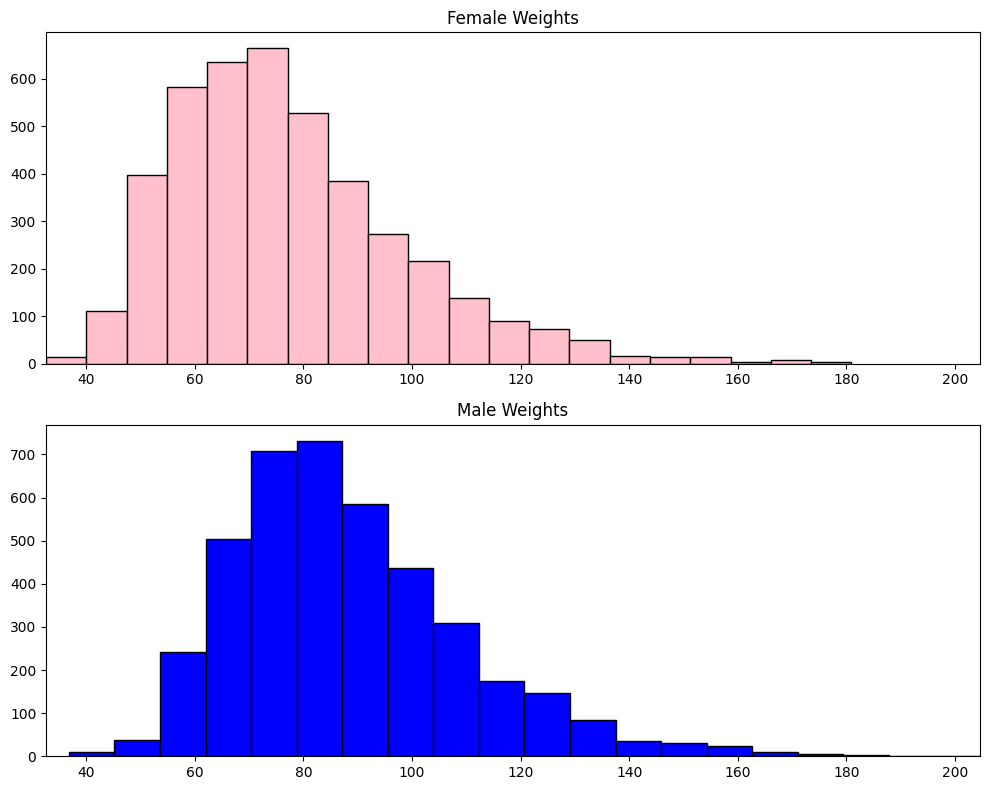

In [69]:
import matplotlib.pyplot as plt

# Extract weights
female_weights = female[:, 0]  # assuming weights are in the first column
male_weights = male[:, 0]      # assuming weights are in the first column

# Filter out NaN and Inf values
female_weights = female_weights[np.isfinite(female_weights)]
male_weights = male_weights[np.isfinite(male_weights)]

# Determine x-axis limits
if female_weights.size > 0 and male_weights.size > 0:
    min_weight = min(np.min(female_weights), np.min(male_weights))
    max_weight = max(np.max(female_weights), np.max(male_weights))
    xlim = (min_weight, max_weight)
else:
    xlim = (0, 100)  # default limits if data is invalid or empty

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot histogram for female weights
ax1.hist(female_weights, bins=20, color='pink', edgecolor='black')
ax1.set_title('Female Weights')
ax1.set_xlim(xlim)

# Plot histogram for male weights
ax2.hist(male_weights, bins=20, color='blue', edgecolor='black')
ax2.set_title('Male Weights')
ax2.set_xlim(xlim)

# Adjust layout
plt.tight_layout()
plt.show()


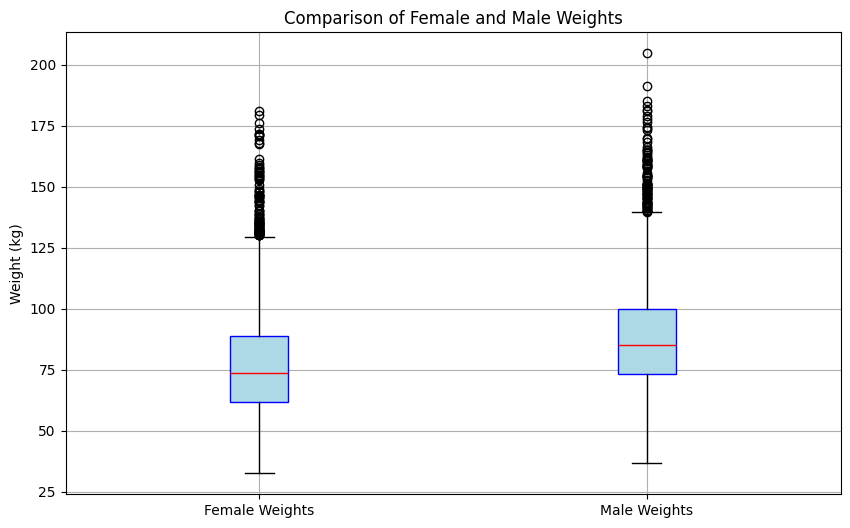

In [70]:
# Create a box-and-whisker plot
data = [female_weights, male_weights]

plt.figure(figsize=(10, 6))
plt.boxplot(data, tick_labels=['Female Weights', 'Male Weights'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

plt.title('Comparison of Female and Male Weights')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()


In [ ]:
#To compute the basic numerical aggregates of the male and female weights, we will calculate the following statistical measures for both datasets:

#Measures of Location:

#Mean: The average weight.
#Median: The middle value when weights are sorted.
#Mode: The most frequently occurring weight.

#Measures of Dispersion:

#Variance: The average squared deviation from the mean.
#Standard Deviation: The square root of the variance.
#Range: The difference between the maximum and minimum weights.
#Interquartile Range (IQR): The difference between the 75th and 25th percentiles.

#Measures of Shape:

#Skewness: Measures the asymmetry of the distribution.
#Kurtosis: Measures the "tailedness" of the distribution.

In [71]:
import scipy.stats as stats
# Measures of Location
mean_female = np.mean(female_weights)
median_female = np.median(female_weights)

# Handling mode calculation
mode_female_result = stats.mode(female_weights, axis=None)
mode_female = mode_female_result.mode[0] if isinstance(mode_female_result.mode, np.ndarray) else mode_female_result.mode

mean_male = np.mean(male_weights)
median_male = np.median(male_weights)

mode_male_result = stats.mode(male_weights, axis=None)
mode_male = mode_male_result.mode[0] if isinstance(mode_male_result.mode, np.ndarray) else mode_male_result.mode

# Measures of Dispersion
var_female = np.var(female_weights)
std_female = np.std(female_weights)
range_female = np.ptp(female_weights)
iqr_female = np.percentile(female_weights, 75) - np.percentile(female_weights, 25)

var_male = np.var(male_weights)
std_male = np.std(male_weights)
range_male = np.ptp(male_weights)
iqr_male = np.percentile(male_weights, 75) - np.percentile(male_weights, 25)

# Measures of Shape
skew_female = stats.skew(female_weights)
kurtosis_female = stats.kurtosis(female_weights)

skew_male = stats.skew(male_weights)
kurtosis_male = stats.kurtosis(male_weights)

# Print results
print(f"Female Weights: Mean = {mean_female}, Median = {median_female}, Mode = {mode_female}")
print(f"Variance = {var_female}, Standard Deviation = {std_female}, Range = {range_female}, IQR = {iqr_female}")
print(f"Skewness = {skew_female}, Kurtosis = {kurtosis_female}")

print(f"\nMale Weights: Mean = {mean_male}, Median = {median_male}, Mode = {mode_male}")
print(f"Variance = {var_male}, Standard Deviation = {std_male}, Range = {range_male}, IQR = {iqr_male}")
print(f"Skewness = {skew_male}, Kurtosis = {kurtosis_male}")


Female Weights: Mean = 77.40379057095475, Median = 73.6, Mode = 75.8
Variance = 464.07966343304065, Standard Deviation = 21.54250829019315, Range = 148.3, IQR = 27.1
Skewness = 1.03336107186799, Kurtosis = 1.4009683480659731

Male Weights: Mean = 88.36454300416565, Median = 85.0, Mode = 79.0
Variance = 458.770850128082, Standard Deviation = 21.418936717962495, Range = 167.8, IQR = 26.5
Skewness = 0.9842810741662347, Kurtosis = 1.4742884754078238


In [ ]:
'''Analysis and Comparison

Measures of Central Tendency:
The mean weight for males (88.36 kg) is higher than that for females (77.40 kg).
The median weight for males (85.0 kg) is also higher than that for females (73.6 kg), indicating that the central point of the male weight distribution 
is greater.
The mode for females (75.8 kg) is closer to their median and mean compared to males, whose mode (79.0 kg) is lower than both the median and mean.

Measures of Dispersion:
Both distributions have similar variances and standard deviations, indicating comparable levels of spread in the data.
The range for male weights (167.8 kg) is greater than for female weights (148.3 kg), showing a wider spread of weights among males.
The IQR values are quite similar, with females having an IQR of 27.1 and males 26.5, indicating that the middle 50% of weights are spread similarly.

Skewness:
Both distributions are positively skewed (right-skewed), meaning that there are more weights clustered on the left with longer tails on the right.
The skewness for females (1.03) is slightly higher than for males (0.98), indicating a slightly more pronounced right tail in the female weight 
distribution.

Kurtosis:
Both distributions have positive kurtosis, indicating they are leptokurtic (i.e., they have heavier tails and a sharper peak than a normal distribution).
The kurtosis for males (1.47) is slightly higher than for females (1.40), suggesting the male weight distribution has more extreme values or outliers.

Summary
Central Tendency: Males generally weigh more than females.
Dispersion: Both distributions have similar variability, but the range is wider for males.
Shape: Both distributions are right-skewed and leptokurtic, with females having a slightly higher skewness and males having a slightly higher kurtosis.
This analysis indicates that while both groups exhibit similar dispersion and skewness characteristics, males tend to weigh more overall and have a 
slightly wider range of weights. The higher mean and median for males reflect this central tendency difference, and the similar levels of variability 
suggest comparable consistency in weight distribution within each gender.

In [ ]:
'''To add the Body Mass Index (BMI) as the eighth column to the female matrix, you need to compute the BMI for each participant using the formula:

BMI=weight (kg)/(height (m))^2

Since the height in your data is given in centimeters, you'll first need to convert it to meters. Here's how you can do it:

In [72]:
# Read the female data from the specified file path
female = np.genfromtxt('C:\\Users\\Shruti Mishra\\Downloads\\female_data.csv', delimiter=',', skip_header=1)

# Extract weight (in kg) and height (in cm)
weights = female[:, 0]
heights_cm = female[:, 1]

# Convert height from cm to meters
heights_m = heights_cm / 100

# Calculate BMI
bmi = weights / (heights_m ** 2)

# Append BMI as the eighth column
female_with_bmi = np.column_stack((female, bmi))

# Print the updated female matrix with BMI as the eighth column
print(female_with_bmi)

#This code will compute the BMI for each female participant and append it to the original matrix,resulting in a new matrix with eight 
#columns where the last column represents the BMI.

[[ 97.1        160.2         34.7        ... 126.1        117.9
   37.83504078]
 [ 91.1        152.7         33.5        ... 125.5        103.1
   39.06972037]
 [ 73.         161.2         37.4        ... 106.2         92.
   28.09265496]
 ...
 [ 73.         159.6         36.2        ... 104.6         99.3
   28.65873958]
 [ 78.6        168.5         38.1        ... 102.4         98.5
   27.68361084]
 [ 82.8        147.8         34.8        ... 121.4        110.
   37.90368801]]


In [ ]:
#The z-score is computed using the formula:
#𝑧=𝑥−𝜇/𝜎
#where x is the value,μ is the mean of the column, and  σ is the standard deviation of the column.

In [73]:
# Read the female data from the specified file path
female = np.genfromtxt('C:\\Users\\Shruti Mishra\\Downloads\\female_data.csv', delimiter=',', skip_header=1)

# Calculate the mean and standard deviation for each column
means = np.mean(female, axis=0)
stds = np.std(female, axis=0)

# Compute the z-scores for each column
zfemale = (female - means) / stds

# Print the standardized female matrix
print(zfemale)


[[ 9.14295084e-01  8.95037880e-03 -5.67394633e-01 ...  5.50845463e-01
   1.08316157e+00  1.11578462e+00]
 [ 6.35775985e-01 -1.05306843e+00 -1.07893145e+00 ...  1.03221804e+00
   1.04475528e+00  2.65088995e-01]
 [-2.04423297e-01  1.50552886e-01  5.83563204e-01 ... -1.62299099e-01
  -1.90646881e-01 -3.72932724e-01]
 ...
 [-2.04423297e-01 -7.60111255e-02  7.20263874e-02 ... -2.33613555e-01
  -2.93063641e-01  4.66671455e-02]
 [ 5.55278621e-02  1.18425119e+00  8.81959680e-01 ...  5.86502692e-01
  -4.33886685e-01  6.83598104e-04]
 [ 2.50491231e-01 -1.74692071e+00 -5.24766565e-01 ...  1.21050418e+00
   7.82312335e-01  6.61697091e-01]]


In [74]:
print("Shape of zfemale:", zfemale.shape)

Shape of zfemale: (4221, 7)


In [75]:
import numpy as np

# Read the female data from the specified file path
female = np.genfromtxt('C:\\Users\\Shruti Mishra\\Downloads\\female_data.csv', delimiter=',', skip_header=1)

# Calculate BMI = weight (kg) / (height (m)^2)
heights_in_m = female[:, 1] / 100  # Convert height from cm to meters
bmi = female[:, 0] / (heights_in_m ** 2)

# Add BMI column to the female matrix
female_with_bmi = np.column_stack((female, bmi))

# Check the shape to confirm BMI column is added
print(female_with_bmi.shape)  # Should print (number_of_rows, 8)


(4221, 8)


In [76]:
# Calculate the mean and standard deviation for each column
means = np.mean(female_with_bmi, axis=0)
stds = np.std(female_with_bmi, axis=0)

# Compute the z-scores for each column
zfemale = (female_with_bmi - means) / stds

# Check the shape to ensure z-scores are computed correctly
print(zfemale.shape)  # Should print (number_of_rows, 8)


(4221, 8)


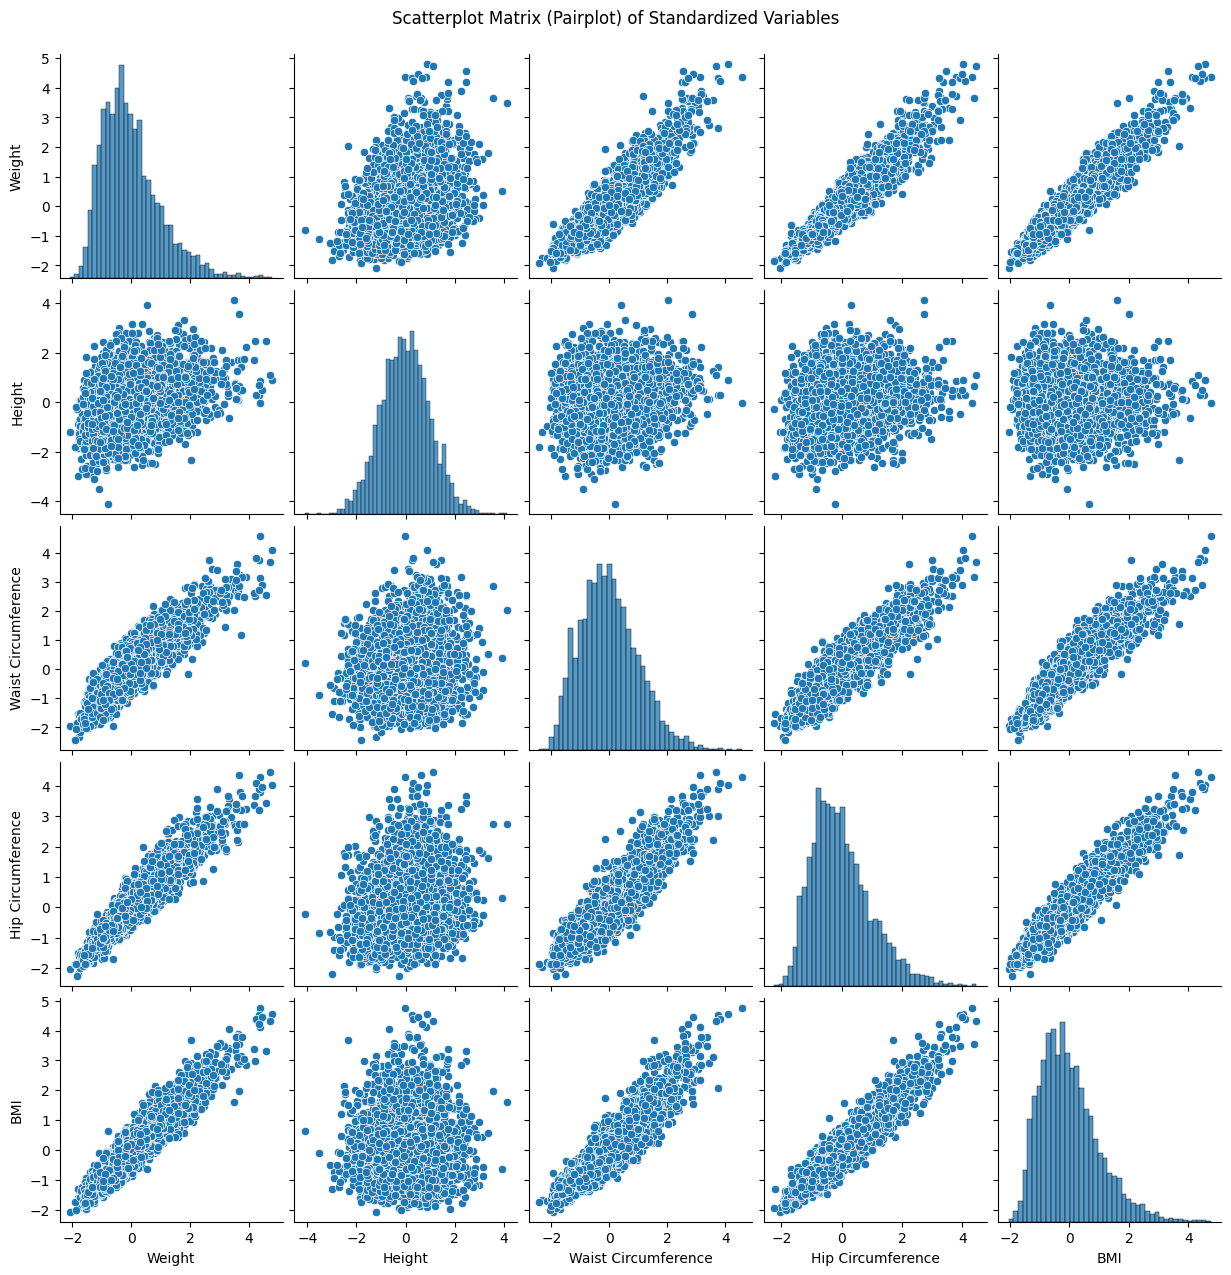

Pearson Correlation Coefficients:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.904550   
Height               0.345496  1.000000             0.126547   
Waist Circumference  0.904550  0.126547             1.000000   
Hip Circumference    0.946553  0.202895             0.897407   
BMI                  0.945900  0.033077             0.921198   

                     Hip Circumference       BMI  
Weight                        0.946553  0.945900  
Height                        0.202895  0.033077  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  

Spearman Correlation Coefficients:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.900169   
Height               0.338860  1.000000             0.108587   
Waist Circumference  0.900169  0.108587        

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the column names including BMI
column_names = ['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI']

# Create a DataFrame with the standardized columns
data = pd.DataFrame(zfemale, columns=column_names)

# Select columns of interest for the scatterplot matrix
columns_of_interest = ['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']

# Filter the DataFrame to include only the columns of interest
data = data[columns_of_interest]

# Draw the scatterplot matrix
sns.pairplot(data)
plt.suptitle('Scatterplot Matrix (Pairplot) of Standardized Variables', y=1.02)
plt.show()

# Compute Pearson’s and Spearman’s correlation coefficients
pearson_corr = data.corr(method='pearson')
spearman_corr = data.corr(method='spearman')

print("Pearson Correlation Coefficients:")
print(pearson_corr)

print("\nSpearman Correlation Coefficients:")
print(spearman_corr)


In [ ]:
'''Interpretation of the Correlation Coefficients
Pearson Correlation Coefficients
Pearson correlation coefficients measure the linear relationship between two continuous variables. The values range from -1 to 1, where:
- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

For the female dataset:

1.Weight and Waist Circumference (0.904550): There is a strong positive linear relationship, indicating that as weight increases, waist circumference 
  tends to increase as well.
2.Weight and Hip Circumference (0.946553): There is a very strong positive linear relationship between weight and hip circumference.
3.Weight and BMI (0.945900): There is a very strong positive linear relationship between weight and BMI, as expected since BMI is directly calculated 
  from weight and height.
4.Height and Weight (0.345496): There is a moderate positive linear relationship between height and weight.
5.Height and BMI (0.033077): There is a very weak positive linear relationship between height and BMI, suggesting height does not significantly affect 
  BMI independently.

Spearman Correlation Coefficients
Spearman correlation coefficients measure the monotonic relationship between two continuous variables. It is less sensitive to outliers and does not 
assume a linear relationship.

For the female dataset:

1.Weight and Waist Circumference (0.900169): Similar to Pearson, there is a strong positive monotonic relationship.
2.Weight and Hip Circumference (0.946634): There is a very strong positive monotonic relationship, consistent with Pearson.
3.Weight and BMI (0.937999): There is a very strong positive monotonic relationship between weight and BMI.
4.Height and Weight (0.338860): There is a moderate positive monotonic relationship between height and weight.
5.Height and BMI (0.019897): There is a very weak positive monotonic relationship between height and BMI.

General Observations
1. Strong Relationships: 
   - Weight is strongly correlated with both hip and waist circumferences in both Pearson and Spearman coefficients.
   - BMI shows strong correlations with weight, waist circumference, and hip circumference.

2. Moderate Relationships:
   - Height shows a moderate correlation with weight, which is consistent across both Pearson and Spearman coefficients.

3. Weak Relationships:
   - Height has a very weak relationship with BMI, suggesting that while BMI is influenced by height, weight plays a much larger role.

### Summary
The analysis shows that weight, waist circumference, and hip circumference are strongly interrelated, which is consistent with body composition 
characteristics. BMI also shows strong correlations with these measures, reinforcing the fact that BMI is derived from weight and height. Height, 
however, shows weaker correlations, particularly with BMI, indicating that weight is a more significant factor in determining BMI and body circumference 
measurements.

In [80]:
female_waist_to_height = female[:, 6] / female[:, 1]
female_waist_to_hip = female[:, 6] / female[:, 5]

# Append these new columns to the female matrix
female = np.column_stack((female, female_waist_to_height, female_waist_to_hip))

# Compute the waist-to-height ratio and waist-to-hip ratio for males
male_waist_to_height = male[:, 6] / male[:, 1]
male_waist_to_hip = male[:, 6] / male[:, 5]

# Append these new columns to the male matrix
male = np.column_stack((male, male_waist_to_height, male_waist_to_hip))

# Verify the new columns are added
print("Female Matrix with Ratios:\n", female)
print("Male Matrix with Ratios:\n", male)

Female Matrix with Ratios:
 [[ 97.1        160.2         34.7        ... 117.9          0.73595506
    0.93497224]
 [ 91.1        152.7         33.5        ... 103.1          0.67518009
    0.82151394]
 [ 73.         161.2         37.4        ...  92.           0.5707196
    0.86629002]
 ...
 [ 73.         159.6         36.2        ...  99.3          0.62218045
    0.94933078]
 [ 78.6        168.5         38.1        ...  98.5          0.58456973
    0.96191406]
 [ 82.8        147.8         34.8        ... 110.           0.74424899
    0.90609555]]
Male Matrix with Ratios:
 [[ 98.8        182.3         42.         ... 120.4          0.66044981
    1.11275416]
 [ 74.3        184.2         41.1        ...  86.8          0.47122693
    0.91851852]
 [103.7        185.3         47.         ... 109.6          0.59147329
    1.01669759]
 ...
 [108.8        168.7         38.6        ... 114.7          0.67990516
    0.9720339 ]
 [ 79.5        176.4         39.5        ...  97.1          0.5504

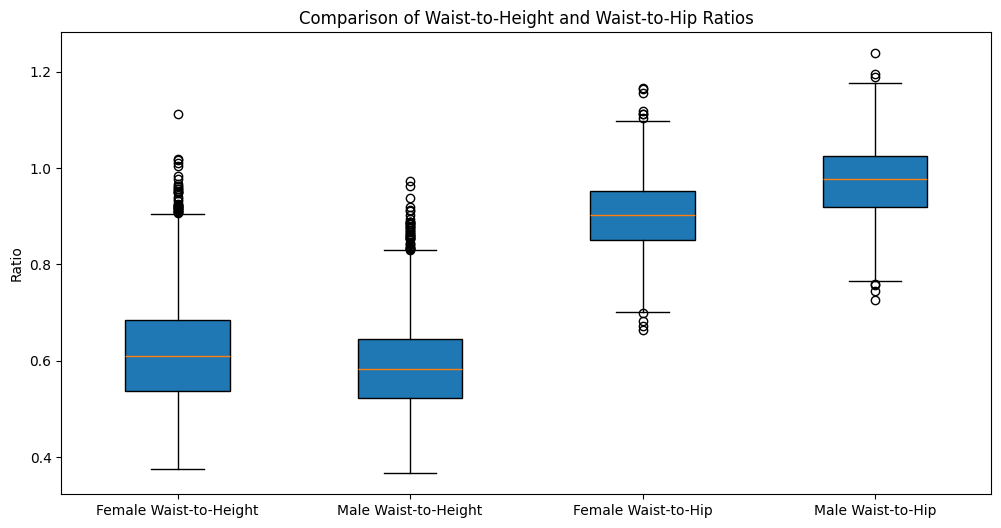

In [82]:
import matplotlib.pyplot as plt

# Assuming the ratios are in the last two columns of the matrices
female_waist_to_height = female[:, -2]
female_waist_to_hip = female[:, -1]
male_waist_to_height = male[:, -2]
male_waist_to_hip = male[:, -1]

# Prepare the data for the boxplot
data = [female_waist_to_height, male_waist_to_height, female_waist_to_hip, male_waist_to_hip]
tick_labels = ['Female Waist-to-Height', 'Male Waist-to-Height', 'Female Waist-to-Hip', 'Male Waist-to-Hip']

# Draw the box-and-whisker plot
plt.figure(figsize=(12, 6))
plt.boxplot(data, tick_labels=tick_labels, patch_artist=True)

# Add titles and labels
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')

# Display the plot
plt.show()


In [ ]:
'''Body Mass Index (BMI)
Advantages:
- Simple and easy to calculate.
- Widely used and accepted.

Disadvantages:
- Doesn't distinguish between muscle and fat.
- Ignores fat distribution.

Waist-to-Height Ratio
Advantages:
- Better reflects abdominal fat and associated health risks.
- Simple and effective.

Disadvantages:
- Doesn't account for muscle mass.
- Requires accurate measurements.

Waist-to-Hip Ratio
Advantages:
- Indicates fat distribution and health risks.
- Useful for comparing different populations.

Disadvantages:
- Doesn't measure total body fat.
- Measurement can be inconsistent.

In [83]:
# Assuming 'zfemale' contains the standardized data including the BMI column as the last one

# Extract BMI column
bmi = zfemale[:, -1]

# Get indices of the 5 lowest and 5 highest BMI values
lowest_bmi_indices = np.argsort(bmi)[:5]
highest_bmi_indices = np.argsort(bmi)[-5:]

# Combine the indices
selected_indices = np.concatenate([lowest_bmi_indices, highest_bmi_indices])

# Extract the relevant rows from zfemale
selected_data = zfemale[selected_indices]

# Print the standardized measurements for the selected individuals
print("Standardized Body Measurements for 5 Persons with Lowest BMI and 5 Persons with Highest BMI:")
print(selected_data)


Standardized Body Measurements for 5 Persons with Lowest BMI and 5 Persons with Highest BMI:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 

In [ ]:
'''5 Persons with Lowest BMI:
- Measurements: The values for the standardized body measurements of these individuals are all negative.
                All values are below average.
- Characteristics: Lower weight, waist, and hip circumference. Likely lower body fat.

5 Persons with Highest BMI:
- Measurements: The values for the standardized body measurements of these individuals are positive.
                All values are above average.
- Characteristics:Higher weight, waist, and hip circumference. Likely higher body fat.